In [3]:
%config Completer.use_jedi = False

In [89]:
%load_ext autoreload
%autoreload 2
from wordle import *
import pandas as pd
from sparrow.performance import MeasureTime
from sparrow import dict_topk
from wordfreq import zipf_frequency

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
filename = "datasets/idiom.json"
df =pd.read_json(filename)

In [79]:
df = pd.read_csv("datasets/words_freq.csv")

In [81]:
wordpinyin = df['key'][0]

In [82]:
wordpinyin

'无论如何:wú lùn rú hé'

In [85]:
from pypinyin.contrib.tone_convert import to_normal, to_tone, to_tone2, to_tone3

In [88]:
to_tone3("wú lùn rú hé")

'wu lun ru he2'

In [26]:
import matplotlib.pyplot as plt

In [30]:
x = np.arange(1, len(df))

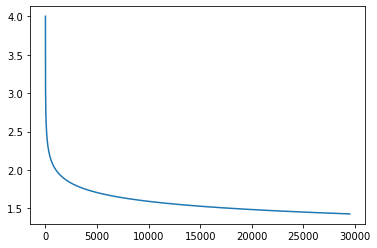

In [78]:
y = 4/x**0.1
plt.plot(x, y)

In [90]:
hs = WordleSolver()

In [94]:
words_entropy_dict, words_info_dict = hs.load_words_entropy_info_dict(12, 0, 2000)

In [97]:
words_info_dict.keys()

dict_keys(['不可思议', '前所未有', '实事求是', '理所当然', '无能为力', '胡说八道', '一模一样', '成千上万', '众所周知', '显而易见', '不知不觉', '难以置信', '独一无二', '不知所以', '所作所为', '与众不同', '如此而已', '好好先生', '自我表现', '乱七八糟', '全心全意', '独立自主', '一无所有', '一无所知', '引人注目', '自然而然', '为所欲为', '莫名其妙', '道德文章', '千方百计', '黄金世界', '黄金时间', '公平交易', '意想不到', '截然不同', '花花公子', '自以为是', '无关紧要', '迫不及待', '总而言之', '天下一家', '各式各样', '无家可归', '史无前例', '微不足道', '随心所欲', '脱颖而出', '手无寸铁', '息息相关', '一如既往', '视而不见', '突然袭击', '和而不同', '表面文章', '小心翼翼', '取而代之', '市民文学', '十字路口', '一举一动', '当务之急', '大有作为', '相提并论', '独立王国', '下落不明', '不知所措', '可想而知', '层出不穷', '谢天谢地', '公平合理', '诸如此类', '没完没了', '有所作为', '革命反正', '逍遥法外', '挺身而出', '大惊小怪', '一年一度', '名列前茅', '轻而易举', '原来如此', '肆无忌惮', '根深蒂固', '不切实际', '无济于事', '自我牺牲', '马上房子', '不得不尔', '全力以赴', '讨价还价', '不顾一切', '大人先生', '大吃一惊', '罪魁祸首', '供不应求', '突如其来', '举足轻重', '不可教训', '从头到尾', '无动于衷', '大有人在', '想方设法', '不遗余力', '错综复杂', '自言自语', '天下第一', '轰轰烈烈', '有朝一日', '经济之才', '至高无上', '日许多时', '归根结底', '无法无天', '无缘无故', '习以为常', '坚定不移', '出乎意料', '不以为然', '当之无愧', '便宜从事', '无与伦比', '一席之地', '三位一体', '小时了了', '别有用心

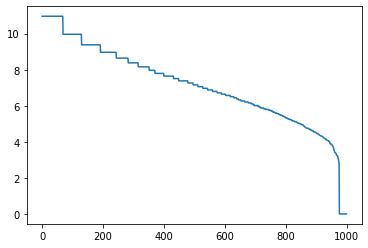

In [104]:
plt.plot(sorted(words_info_dict['不可思议'], reverse=True))

In [149]:
hs.solve("阿斯蒂芬", target_word="猴年马月", show_human=True)


['相同: 无      | 存在别处:a      |均不存在: 1     ',
 '相同: 无      | 存在别处:无      |均不存在:s i 1  ',
 '相同: 无      | 存在别处:4      |均不存在:d i    ',
 '相同: 无      | 存在别处:无      |均不存在:f en 1 ']
['相同: 2      | 存在别处:无      |均不存在:q iao  ',
 '相同: 无      | 存在别处:ou 3   |均不存在:sh     ',
 '相同: 3      | 存在别处:y      |均不存在:in     ',
 '相同: 无      | 存在别处:无      |均不存在:l ing 3']
['相同: 2      | 存在别处:无      |均不存在:r en   ',
 '相同: 2      | 存在别处:y      |均不存在:an     ',
 '相同: 3      | 存在别处:无      |均不存在:k e    ',
 '相同: 4      | 存在别处:无      |均不存在:w ei   ']
['相同: 2      | 存在别处:无      |均不存在:q i    ',
 '相同: 2      | 存在别处:无      |均不存在:l v    ',
 '相同: 3      | 存在别处:无      |均不存在:s uo   ',
 '相同: 4      | 存在别处:无      |均不存在:j u    ']
['相同: 2      | 存在别处:无      |均不存在:p ang  ',
 '相同: 2      | 存在别处:m      |均不存在:en     ',
 '相同: 3      | 存在别处:无      |均不存在:x iao  ',
 '相同: 4      | 存在别处:无      |均不存在:d ao   ']
['相同: 2      | 存在别处:y      |均不存在:ing    ',
 '相同: 2      | 存在别处:y      |均不存在:ing    ',
 '相同: 3      | 存在别处:y      |均不存在:i      ',
 '相同: 4    

In [79]:
# hs.all_idiom_phone_list[2053]

In [99]:
target_word = "才疏计拙"
candi_word = "延颈企踵"
pinyin(candi_word, style=Style.TONE3, neutral_tone_with_five=True)

[['yan2'], ['jing3'], ['qi3'], ['zhong3']]

In [100]:
candi_phone, target_phone = [i for i in hs.separate_to_phone([candi_word, target_word])]
diff_info = hs.compare_word_phone(candi_phone['phone'], target_phone['phone'])
diff_info

[[{('2', 2)}, set(), {('an', 1), ('y', 0)}],
 [set(), {('j', 0)}, {('3', 2), ('ing', 1)}],
 [{('i', 1)}, set(), {('3', 2), ('q', 0)}],
 [{('zh', 0)}, set(), {('3', 2), ('ong', 1)}]]

In [103]:
hs.word_to_human_diff(candi_word, target_word)

{'phone': [{('2', 2), ('c', 0), ('ai', 1)}, {('1', 2), ('u', 1), ('sh', 0)}, {('4', 2), ('j', 0), ('i', 1)}, {('zh', 0), ('uo', 1), ('1', 2)}], 'word': '才疏计拙'}
--------------------------------------------------
['相同: 2      | 存在别处:无      |均不存在:y an   ',
 '相同: 无      | 存在别处:j      |均不存在:ing 3  ',
 '相同: i      | 存在别处:无      |均不存在:q 3    ',
 '相同: zh     | 存在别处:无      |均不存在:ong 3  ']


In [130]:
target_word = "才疏计拙"
candi_word = "姑息养奸"
candidate_words = hs.get_matched_set(candi_word, target_word)
len(candidate_words)

62

In [119]:
candidate_words

['作如是观',
 '粝食粗衣',
 '龙骧蠖屈',
 '铄懿渊积',
 '枝外生枝',
 '国而忘家',
 '冲锋陷坚',
 '天下一家',
 '日月丽天',
 '炊臼之戚',
 '前倨后恭',
 '王孙贵戚',
 '一字兼金',
 '业业矜矜',
 '狼顾鸱张',
 '噀玉喷珠',
 '劳心焦思',
 '乱坠天花',
 '欺人自欺',
 '文章巨公',
 '一枝一栖',
 '时和岁丰',
 '卖笑追欢',
 '日迈月征',
 '日异月新',
 '龙伸蠖屈',
 '一字千秋',
 '要而论之',
 '夏虫朝菌',
 '莫逆之交',
 '贻误军机',
 '鸾孤凤只',
 '花辰月夕',
 '上楼去梯',
 '瞬息之间',
 '抽抽噎噎',
 '再造之恩',
 '日就月将',
 '成竹在胸',
 '又红又专',
 '赤子之心',
 '弢迹匿光',
 '寻幽入微',
 '亿兆一心',
 '同室操戈',
 '熠熠生辉',
 '废私立公',
 '什么意思',
 '赫斯之威',
 '闻声相思',
 '知微知彰',
 '桂子飘香',
 '刨树搜根',
 '一叶知秋',
 '一飞冲天',
 '一线生机',
 '鹤膝蜂腰',
 '同休共戚',
 '刿目怵心',
 '上援下推',
 '一诺千金',
 '力竭声嘶',
 '贼人心虚',
 '下乔入幽',
 '一刻千金',
 '禽困覆车',
 '开云见天',
 '桑间之音',
 '劳身焦思',
 '志在四方',
 '忧心悄悄',
 '疑似之间',
 '一字千钧',
 '膏泽脂香',
 '亡国之音',
 '一龙一猪',
 '风急浪高',
 '啼笑皆非',
 '落叶知秋',
 '弦外之音',
 '昃食宵衣',
 '晖光日新',
 '丰姿绰约',
 '外圆内方',
 '叶落知秋',
 '朝斯夕斯',
 '流光瞬息',
 '孽根祸胎',
 '云树之思',
 '沉默是金',
 '黔驴技孤',
 '费尽心机',
 '是非之心',
 '造谣生非',
 '铜臭熏天',
 '一人之交',
 '一笑千金',
 '文献之家',
 '泉石膏肓',
 '作贼心虚',
 '千金之家',
 '是是非非',
 '贫无置锥',
 '忧心忡忡',
 '国色天姿',
 '披露腹心',
 '趁人之危',
 '捉贼见赃',
 '双宿双飞',
 '逃之夭夭',
 '日堙月塞',
 

In [133]:
candidate_words = hs.get_matched_set(candidate_words[np.random.randint(0, len(candidate_words))], target_word)
len(candidate_words), candidate_words
# candidate_words

(1, ['才疏计拙'])

In [144]:
# epd_diff = [
#     {('3', 2), ('iu', 1), ('j', 0)},
#     {('i', 1), ('d', 0), ('k', 0), ('zh', 0), ('3', 2), ('f', 0), ('uo', 1), ('e', 1), ('p', 0), ('an', 1), ('x', 0), ('ong', 1), ('5', 2), ('s', 0), ('ia', 1), ('ve', 1), ('iao', 1), ('en', 1), ('ou', 1), ('r', 0), ('g', 0), ('ing', 1), ('2', 2), ('ao', 1), ('n', 0), ('uei', 1), ('4', 2), ('a', 1), ('uan', 1), ('o', 1), ('v', 1), ('ei', 1), ('u', 1), ('ang', 1), ('in', 1), ('van', 1), ('c', 0), ('ch', 0), ('j', 0), ('ai', 1), ('eng', 1), ('iang', 1), ('m', 0), ('l', 0), ('iong', 1), ('sh', 0), ('z', 0), ('ueng', 1), ('1', 2), ('uang', 1), ('ua', 1), ('ê', 1), ('uen', 1), ('ie', 1), ('b', 0), ('h', 0), ('', 0), ('q', 0), ('iou', 1), ('uai', 1), ('ian', 1), ('er', 1), ('vn', 1), ('t', 0)},
#     {('i', 1), ('y', 0), ('4', 2)},
#     {('i', 1), ('d', 0), ('k', 0), ('zh', 0), ('3', 2), ('f', 0), ('uo', 1), ('e', 1), ('p', 0), ('an', 1), ('x', 0), ('ong', 1), ('5', 2), ('s', 0), ('ia', 1), ('ve', 1), ('iao', 1), ('en', 1), ('ou', 1), ('r', 0), ('g', 0), ('ing', 1), ('2', 2), ('ao', 1), ('n', 0), ('uei', 1), ('4', 2), ('a', 1), ('uan', 1), ('o', 1), ('v', 1), ('ei', 1), ('u', 1), ('ang', 1), ('in', 1), ('van', 1), ('c', 0), ('ch', 0), ('j', 0), ('ai', 1), ('iang', 1), ('m', 0), ('l', 0), ('iong', 1), ('z', 0), ('ueng', 1), ('uang', 1), ('ua', 1), ('ê', 1), ('uen', 1), ('ie', 1), ('b', 0), ('h', 0), ('', 0), ('q', 0), ('iou', 1), ('uai', 1), ('ian', 1), ('er', 1), ('vn', 1), ('t', 0)},
#     ]          

In [ ]:
epd_diff = hs.expand_diff_info(diff_info)

In [145]:
target = hs.all_idiom_phone_list[2053]['phone']
target

[{('3', 2), ('iu', 1), ('j', 0)},
 {('2', 2), ('iu', 1), ('n', 0)},
 {('4', 2), ('i', 1), ('y', 0)},
 {('2', 2), ('ao', 1), ('m', 0)}]

In [162]:
hs.match(target, epd_diff)

False

In [187]:
from sparrow import load
import matplotlib.pyplot as plt

In [97]:
words_entropy_dict, words_info_dict = load_words_entropy_info_dict()

df = dict_topk(words_entropy_dict, 20)

In [98]:
df

,key,value
8875,延颈企踵,6.778073
2762,以勤补拙,6.773024
1866,举鼎拔山,6.716944
6537,圆颅方趾,6.699962
4839,勇往直前,6.693151
11995,敢勇当先,6.688779
9207,当局者迷,6.687874
12089,文婪武嬉,6.685304
1863,举贤使能,6.665308
2310,五劳七伤,6.663366


In [188]:

plt.plot(sorted(words_info_dict['姑息养奸'], reverse=True))
plt.plot(sorted(words_info_dict['昏昏噩噩'], reverse=True))
plt.plot(sorted(words_info_dict['五音不全'], reverse=True))